In [3]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

%matplotlib inline

#### BigO Notation

When working with algorithms, it's typical to measure their "time" as, not a function of how long it takes an algorithm to run according to a wall clock, but rather as a function of the size of the input of the algorithm. This is called the **rate of growth** of of the running time.

When utilizing BigO notation we can distill the "most important" parts and cast out the less important parts. We can see this by looking at the `ex_run_time` function we've defined below. This imaginary algorithm runtime, $6n^{2}+100n+300$, takes as many machine instruction to execute. Again, this is an example.

In the example below, we've defined two functions that calculate this imaginary runtime according to a user defined input size. We're going to use this illustration to show that the upper bound on this execution time for this algorithm is defined by the $n^2$ portion of the imaginary runtime of $6n_2 + 100n + 300$.

In [139]:
def ex_run_time(coef, n):
    rt = []
    for i in range(n):
         rt.append((i, (coef*(i**2))))
    return rt

def decomp_run_time(coef_a, coef_b, n):
    rt = []
    for i in range(n):
        rt.append((i, ((coef_a*i) + coef_b)))
    return rt

In [140]:
ex_rt = ex_run_time(6, 100)
decomp_rt = decomp_run_time(100, 300, 100)

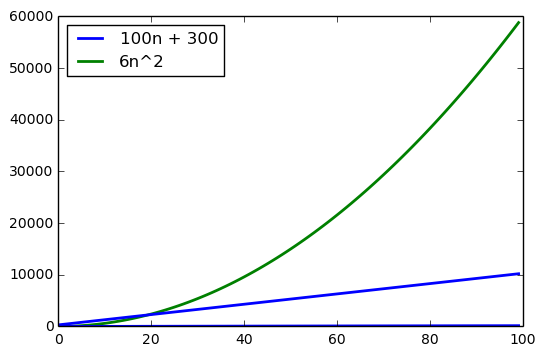

In [141]:
line1_plt = plt.plot(ex_rt, label='Line 1', linewidth=2)
line2_plt = plt.plot(decomp_rt, 'b', label='Line 2', linewidth=2)
plt.legend(['100n + 300','6n^2'], loc=2)
plt.show()

Looking at the graph above, we can see that the runtime of the $6n^2$ portion of the runtime dominates the total runtime of the algorithm, overall. Using this assumption, when working with BigO notation, we can drop the $100n+300$ portion of the runtime complexity, as we're working against the squared element of the overall runtime. Looking at the graph, we also see that the runtime complexity for the $n^2$ term of our algorithm intersects the line for the other terms, as well. But the safe assumption here is that this algorithm's complexity will be overall dominated by the squared term, in any reasonable size input.

We can even scale the coefficients of the imaginary complexity to prove that this intersection won't shift much and we'll still be bounded by the squared term.

In [142]:
scaled_ex_rt = ex_run_time(0.6, 2500)
scaled_decomp_rt = decomp_run_time(1000, 3000, 2500)

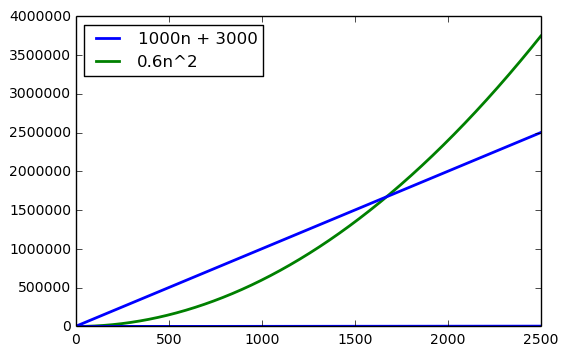

In [143]:
_scaled_line1_plt = plt.plot(scaled_ex_rt, label='Line 1', linewidth=2)
_scaled_line2_plt = plt.plot(scaled_decomp_rt, 'b', label='Line 2', linewidth=2)
plt.legend(['1000n + 3000','0.6n^2'], loc=2)
plt.show()

Checking out the graph above, we see that the size of the input was able to be scaled pretty considerably. But we can also see that around the input size of 1650, we still end up losing our to the squared term in the runtime of out algorithm. Using this logic, for general purposes, for any reasonable input we can use define the runtime complexity of this algorithm as $n^2$.

#### Generator methods

In [10]:
def generate_seq(start, stop, size):
    '''
    Generate a sequence of integers useful in testing the functions below
    '''
    
    return np.random.random_integers(low=start, high=stop, size=size)
        

#### Programming Assignments

In [16]:
def calc_fib(n):
    '''
    Task : Given n, find the last digit of the nth Fibonacci number F_n
    
    Input : Single integer n
    
    Constraints : 0 \ge n \ge 10**7
    
    Output : Last digit of F_n
    
    '''
    int_a = 0
    int_b = 1
    
    if n <= 1:
        return n
    
    elif n >= 0 and n <= 45:
        fib_int = calc_fib(n-1) + calc_fib(n-2)
        return fib_int
    
    else:
        print("%s is out of range. Please try an integer between 0 and 45." % n)

In [23]:
%%time 
for i in generate_seq(1,2000,1):
    calc_fib(10)

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 1.52 ms


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 2000 + 1) instead


In [22]:
def get_fibonacci_last_digit(n):
    '''
    Task : Given n, find the last digit of the nth Fibonacci number F_n
    
    Input : Single integer n
    
    Constraints : 0 \ge n \ge 10**7
    
    Output : Last digit of F_n
    
    '''
    fib_array = np.zeros(shape=n, dtype=int)
    fib_array[0] = int(0)
    fib_array[1] = int(1)
    
    if n >= 0 and n <= 10**7:
        counter = 2
        for i in fib_array[2:n]:
            fib_array[counter] = ((fib_array[counter-1] % 10) + (fib_array[counter-2] % 10))
            counter += 1
        return (fib_array[counter-1] % 10) + (fib_array[counter-2] % 10)
    else:
        print("%s is out of range. Please try an integer between 0 and 10,000,000." % n)

In [10]:
%time
print(get_fibonacci_last_digit(3))
print(get_fibonacci_last_digit(331))
print(get_fibonacci_last_digit(327305))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.8 µs
2
9
5


#### Greatest common divisor

In [11]:
def euclidean_gcd(a,b):
    if b == 0:
        return a
    a_prime = a % b
    return(euclidean_gcd(b,a_prime))

In [16]:
%%time
print(euclidean_gcd(18,35))
print(euclidean_gcd(28851538, 1183019))

1
17657
CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 981 µs


#### Least common multiple

In [17]:
def lcm(a, b):
    if a >= 1 and a <= (2*(10**9)) and b >= 1 and b <= (2*(10**9)):
        return (a*b) // euclidean_gcd(a,b)
    else:
        print("something is wrong")

In [21]:
%time
print(lcm(6,8))
print(lcm(28851538, 1183019))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15 µs
24
1933053046


In [16]:
def get_fibonacci_huge_naive(n, m):
    if n <= 1:
        return n

    previous = 0
    current  = 1

    for _ in range(n - 1):
        previous, current = current, previous + current

    return current % m

In [ ]:
%time
get_fibonacci_huge_naive(2816213588,30524)